In [1]:
import pickle as pkl
import numpy as np
import matplotlib.pyplot as plt
import torch
from cvae import fire

/home/ashandonay/miniconda3/envs/wildfire/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
frames = torch.load('data/frame_pairs.pt')

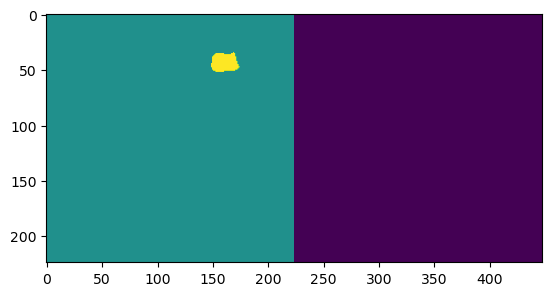

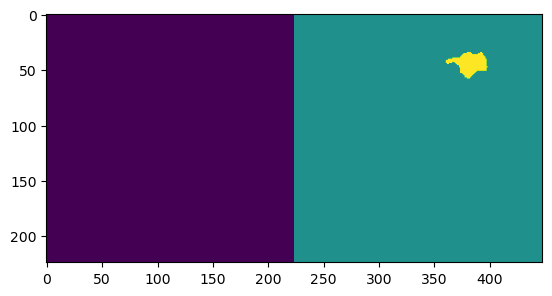

In [5]:
plt.figure()
plt.imshow(mask(frames)["input"][5])
plt.show()

plt.figure()
plt.imshow(mask(frames)["output"][5])
plt.show()

yes


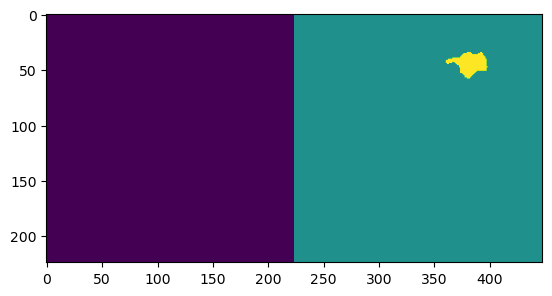

In [27]:
plt.figure()
plt.imshow(mask(frames)["output"][5])
plt.show()

In [82]:
datasets["train"] = frames[:num_train_samples]

In [77]:
num_test_samples

40

In [2]:
pkl_file = open('fire_frames.pkl', 'rb')

In [4]:
frames = pkl.load(pkl_file)

In [24]:
tensor_frames = torch.stack([torch.from_numpy(frame) for frame in frames])

In [25]:
new_frames = tensor_frames[0:158] 

In [61]:
# organize frames into Nx2x224x224 tensor where each pair is one frame and the next step
frames = torch.stack([new_frames[:-1], new_frames[1:]], dim=1)
frames.shape

torch.Size([157, 2, 224, 224])

In [ ]:
# convert true or false to 1 or 0
frames = frames.type(torch.FloatTensor)

In [62]:
# concatenate the frames into a single tensor of shape Nx224x448
frames = torch.cat([frames[:,0], frames[:,1]], dim=2)

In [65]:
# save the frames as a pickle file
torch.save(frames, 'data/frame_pairs.pt')

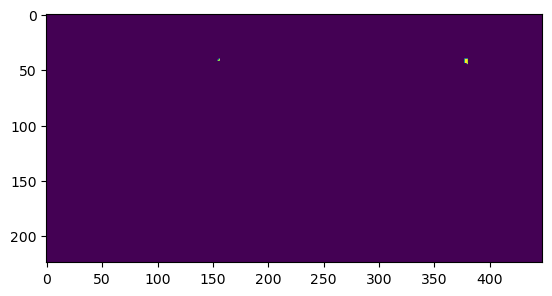

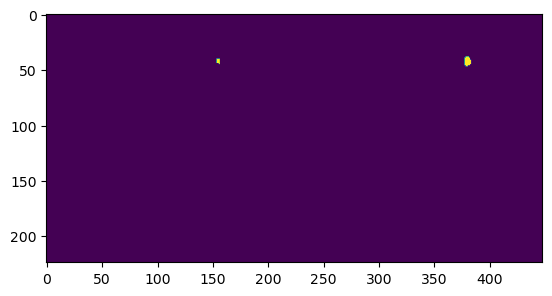

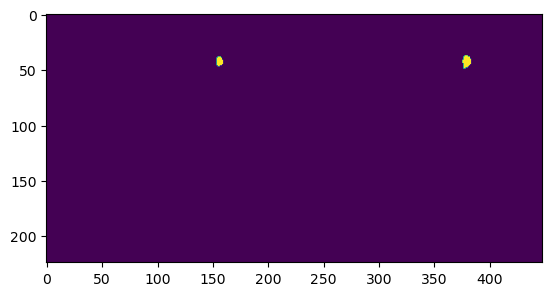

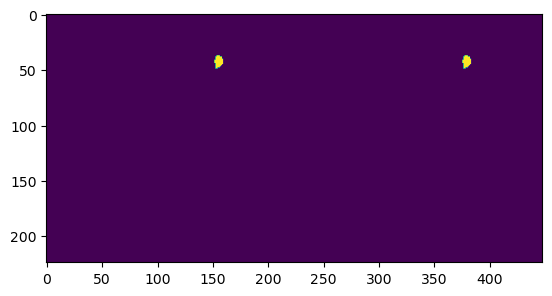

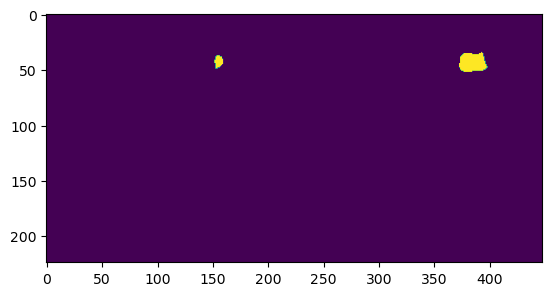

In [64]:
plt.figure()
for i in range(5):
    plt.imshow(frames[i])
    plt.show()

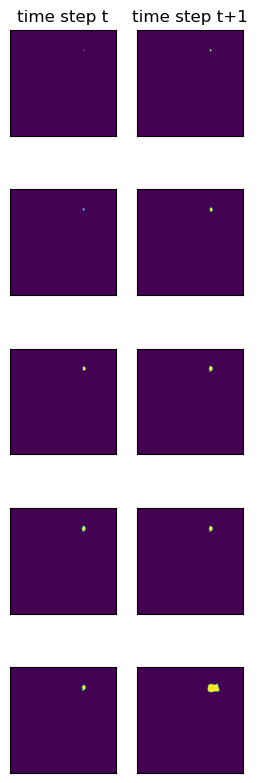

In [56]:
fig, ax = plt.subplots(5, 2, figsize=(3, 10))
for i,x in enumerate(range(5)):
    ax[i, 0].imshow(frames[x][0])
    ax[i, 1].imshow(frames[x][1])
ax[0,0].set_title('time step t')
ax[0,1].set_title('time step t+1')
# remove ticks
for ax in ax.flatten():
    ax.set_xticks([])
    ax.set_yticks([])
plt.show()